# NumPy Arrays

In [1]:
import numpy as np

## Arrays

In [2]:
X = np.array([1,2,3])
M = np.array([
    [1,2],
    [3,4],
    [5,6]
])

## Reshaping

`Example 1` : Vector to matrix

In [3]:
x = np.array([1,2,3,4,5,6])
M = x.reshape(3,2)
M

array([[1, 2],
       [3, 4],
       [5, 6]])

`Example 2` : Matrix to vector

In [4]:
M = np.array([[1,2,3], [4,5,6]])
x = M.flatten()
x

array([1, 2, 3, 4, 5, 6])

`Example 3` : Matrix to Matrix

In [5]:
M = np.array([[1,2,3], [4,5,6]])
P = M.reshape(3,-1)
P

array([[1, 2],
       [3, 4],
       [5, 6]])

## Matrix-vector addition

### Row-Vector

In [6]:
M = np.array([[1,2,3], [4,5,6]])
b = np.array([1,2,3])

M + b

array([[2, 4, 6],
       [5, 7, 9]])

### Column-Vector

In [7]:
M = np.array([[1,2,3], [4,5,6]])
b = np.array([1,2]).reshape(2,1)
M + b

array([[2, 3, 4],
       [6, 7, 8]])

## Advanced Indexing

### Indexing Using arrays

In [8]:
X = np.array([-1,0,4,3,7,8,1,9])
X[np.array([1,3,6])]

array([0, 3, 1])

### Filtering particular values

In [9]:
X = np.array([3,1,5,-4,-2,1,5])
X > 0

array([ True,  True,  True, False, False,  True,  True])

In [10]:
X = np.array([3,1,5,-4,-2,1,5])
X[X > 3]

array([5, 5])

### Filtering and follow-up

Let us try to implement ReLU function.

$$
\text{ReLU}(x) = \begin{cases}
x, & x\geqslant 0\\
0, & x < 0
\end{cases}
$$

In [11]:
def relu(x) :
  return np.where(x > 0, x, 0)

relu(np.array([1,-2,1,3,-4,-3]))

array([1, 0, 1, 3, 0, 0])

## Operations along axes

### Top-bottom

In [12]:
A = np.arange(1,9).reshape(2,4)
A.sum(axis = 0)

array([ 6,  8, 10, 12])

### Left-right

In [13]:
A.sum(axis = 1)

array([10, 26])

## Sum, Mean, Variance, Norm

In [14]:
M = np.arange(1,10).reshape(3,3)
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Sum

In [15]:
# Sum of column vectors
M.sum(axis = 1)

array([ 6, 15, 24])

In [16]:
# Sum of row vectors
M.sum(axis = 0)

array([12, 15, 18])

### Mean

In [17]:
# Mean of column vectors
M.mean(axis = 1)

array([2., 5., 8.])

In [18]:
# Mean of row vectors
M.mean(axis = 0)

array([4., 5., 6.])

### Variance

In [19]:
# Variance of column vectors
M.var(axis = 1)

array([0.66666667, 0.66666667, 0.66666667])

## Stacking Arrays

### Top-bottom

In [20]:
A = np.array([
    [1,2],
    [3,4]
])
B = np.array([
    [5,6],
    [7,8]
])

np.concatenate((A,B), axis = 0)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

### Left-right

In [21]:
A = np.array([
    [1,2],
    [3,4]
])
B = np.array([
    [5,6],
    [7,8]
])

np.concatenate((A,B), axis = 1)

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

## Misc Functions

Let us look at a few other functions that are quite useful :     
- max and argmax
- min and argmin
- sort and argsort
___

- max : will give the maximum value in the array
- argmax : will give the index of the maximum value in the array

In [22]:
X = np.array([10,-3,2,15,5])
X

array([10, -3,  2, 15,  5])

In [23]:
# max , argmax
np.max(X), np.argmax(X)

(np.int64(15), np.int64(3))

In [24]:
# min , argmin
np.min(X), np.argmin(X)

(np.int64(-3), np.int64(1))

In [25]:
# sort , argsort
np.sort(X) , np.argsort(X)

(array([-3,  2,  5, 10, 15]), array([1, 2, 4, 0, 3]))

In [26]:
M = np.array([
    [1,3,5],
    [3,-1,-4]
])

np.max(M, axis = 1)

array([5, 3])

A similar mechanism holds for sort :      

In [27]:
M = np.array([
    [1,3,5],
    [8,-1,-4],
    [5,-4,10]
])

np.sort(M, axis = 0)

array([[ 1, -4, -4],
       [ 5, -1,  5],
       [ 8,  3, 10]])

In [28]:
np.sort(M, axis = 1)

array([[ 1,  3,  5],
       [-4, -1,  8],
       [-4,  5, 10]])

## Load the dataset

In [30]:
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [31]:
train, test = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [32]:
X, y = train

In [34]:
print(X.shape)
print(y.shape)

(60000, 28, 28)
(60000,)


Let us look at a sample image. It is of shape 28 x 28

In [38]:
img = X[y == 5]
img.shape

(5421, 28, 28)

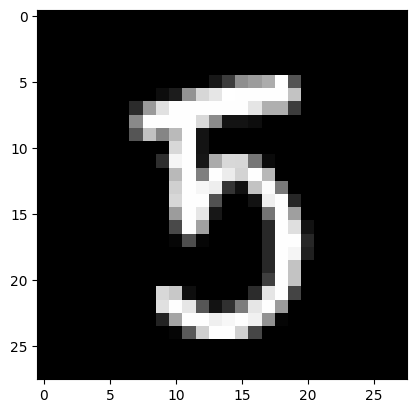

In [39]:
img = X[y == 5][105]
img.shape
plt.imshow(img, cmap = 'gray')

This can be treated as tabular dataset. To do this, we would have to reshape the data-matrix.

In [42]:
print('Original Shape',X.shape)
X = X.reshape(60000, -1).T
print("Final shape", X.shape)

Original Shape (784, 60000)
Final shape (784, 60000)


We can now treate this as a dat-matrix of shape d x n where d = 784 and n = 60,000